## mehmetfatihdata

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')


In [2]:
titanic=pd.read_csv('dataset/titanic.csv')
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [3]:
titanic["sex"]=titanic.Sex.replace({'female':1,'male':0})
titanic=titanic.drop(columns='Sex',axis=0)
titanic['Age_inter'] = titanic.groupby("sex")['Age'].transform(lambda x: x.interpolate())
titanic['Age_inter'].isnull().sum()/len(titanic)

0.0

In [4]:
titanic['Age']=titanic['Age_inter']
X = titanic [['PassengerId', 'Pclass', 'SibSp','Age', 'sex',
       'Parch', 'Fare']]
y = titanic['Survived']

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [67]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [68]:
log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
egitim_dogruluk = log_reg.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [9]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_eğitim, y_eğitim)
egitim_dogruluk = log_reg_mnm.score(X_eğitim, y_eğitim)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [10]:
tahmin_eğitim = log_reg.predict(X_eğitim)
tahmin_test = log_reg.predict(X_test)
tahmin_test_ihtimal = log_reg.predict_proba(X_test)[:,1]

In [11]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [12]:
print("Hata Matrisi (Eğitim verileri):", hata_matrisi_eğitim, sep="\n")
print( "-"*30, "-"*30,"Hata Matrisi (Test verileri):", hata_matrisi_test, "-"*30, sep="\n")
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Hata Matrisi (Eğitim verileri):
[[375  61]
 [ 82 194]]
------------------------------
------------------------------
Hata Matrisi (Test verileri):
[[95 18]
 [22 44]]
------------------------------
Doğru negatif sayısı   : 95
Doğru pozitif sayısı   : 44
Yanlış pozitif sayısı  : 18
Yanlış negatif sayısı  : 22


In [13]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.776536312849162
Hesaplanan doğruluk değeri      :  0.776536312849162
accuracy_score() değeri         :  0.776536312849162


In [14]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.7096774193548387
precision_score() değeri        :  0.7096774193548387


In [15]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8407079646017699


In [16]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.6666666666666666
recall_score() değeri        :  0.6666666666666666


In [17]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.6875
f1_score() değeri     :  0.6875


In [18]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       113
           1       0.71      0.67      0.69        66

    accuracy                           0.78       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179

f1_score() değeri        : 0.69
recall_score() değeri    : 0.67
precision_score() değeri : 0.71


Hassasiyet : [0.81196581 0.70967742]
Duyarlılık : [0.84070796 0.66666667]
F1 Skoru   : [0.82608696 0.6875    ]


In [19]:
tahmin_test_ihtimal = log_reg.predict_proba(X_test)[:,1]

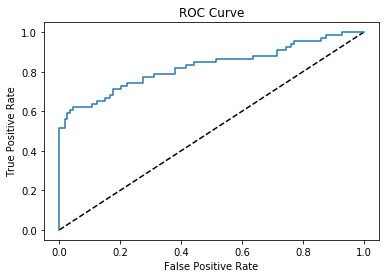

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [21]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8255564494502547


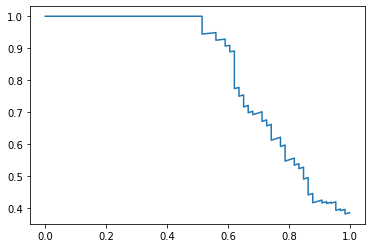

In [22]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

In [23]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.46460801619748704
Hata Oranı                  :  0.22346368715083798


In [24]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)    

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.001,0.693820,0.653631
1,0.010,0.731742,0.709497
2,0.100,0.800562,0.782123
3,1.000,0.799157,0.776536
4,10.000,0.801966,0.770950
5,100.000,0.800562,0.770950
6,1000.000,0.797753,0.776536


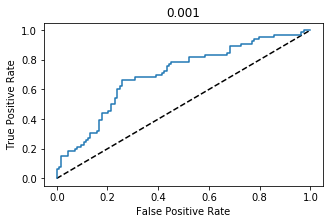

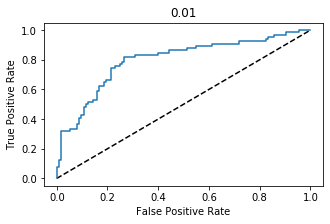

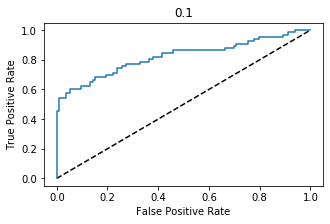

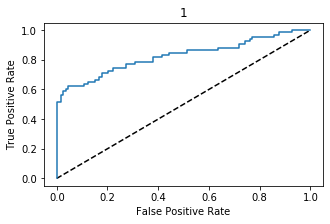

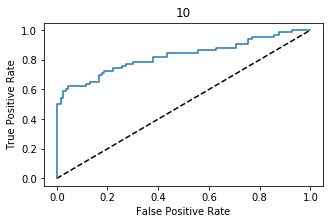

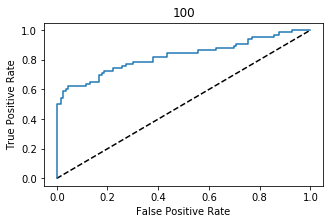

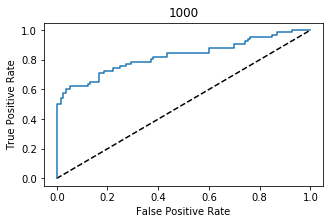

In [93]:
for c in C_değerleri:

    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_eğitim,y_eğitim)
    tahmin_test_ihtimal = lr.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)
    i=0
    
    plt.figure(figsize=(5,3))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(c)
    
plt.show()

END.